## Setup

Import modules

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


from ydata_profiling import ProfileReport
import sweetviz as sv
from scipy.stats import pearsonr

Define constants and import dataset

In [99]:
DATASET = '../udataset/meat_production.csv'
START_DATE = '2010-01'
END_DATE = '2022-12'

meat_df = pd.read_csv(DATASET)
meat_df = meat_df.rename(columns = {'DateTime': 'year-month'})

In [100]:
UNEMPLOYMENTDATA = '../udataset/unemployment_by_state.csv'
unemployment_df = pd.read_csv(UNEMPLOYMENTDATA)
unemployment_df.columns = unemployment_df.columns.str.strip()
unemployment_df = unemployment_df.rename(columns={'YearMonth': 'year-month', 'unemploymentrate': 'unemployment-rate'})
unemployment_df.columns = unemployment_df.columns.str.lower()
unemployment_df = unemployment_df.rename(columns={'YearMonth': 'year-month', 'unemploymentrate': 'unemployment-rate'})
unemployment_df

,state,year-month,unemployment-rate
0,alabama,2010-01,11.7
1,alabama,2010-02,11.4
2,alabama,2010-03,11.0
3,alabama,2010-04,10.1
4,alabama,2010-05,9.9
...,...,...,...
8835,puerto rico,2023-10,5.5
8836,puerto rico,2023-11,5.7
8837,puerto rico,2023-12,5.8
8838,puerto rico,2024-01,5.8


In [101]:
POVERTYDATA ='../udataset/wealth_data_interpolated.csv'
poverty_df = pd.read_csv(POVERTYDATA)
poverty_df['date'] = poverty_df['date'].str.slice(0, 7)
poverty_df = poverty_df.rename(columns = {'date': 'year-month'})
poverty_df

,year-month,below_poverty_line_percent,state
0,2010-01,24.273973,alabama
1,2010-02,24.343014,alabama
2,2010-03,24.419452,alabama
3,2010-04,24.493425,alabama
4,2010-05,24.569863,alabama
...,...,...,...
7483,2021-08,12.734131,wyoming
7484,2021-09,12.709994,wyoming
7485,2021-10,12.679597,wyoming
7486,2021-11,12.644392,wyoming


In [102]:
unemployment_df = pd.merge(unemployment_df, poverty_df, on=['year-month', 'state'])

In [103]:
#unemployment_rate = [9.63, 8.95, 8.07, 7.37, 6.17, 5.28, 4.87, 4.36, 3.90, 3.67, 8.05, 5.35, 3.61]
for state in unemployment_df['state'].unique():
    temp_df = unemployment_df[unemployment_df['state'] == state].copy()
    temp_df['unemployment-rate'] = temp_df['below_poverty_line_percent']/temp_df['unemployment-rate']
    temp_df = temp_df.rename(columns={'unemployment-rate': f'{state}-unemployment-rate', 'below_poverty_line_percent': f"{state}-poverty-percent"})
    temp_df = temp_df.drop(columns=['state'])

    print(temp_df.columns)
    meat_df = pd.merge(meat_df, temp_df, on=['year-month'])


meat_df = meat_df.drop(columns = ['Unnamed: 0'])

#print(new_df['unemployment_rate'].expanding().corr(new_df['S&P_growth']))

Index(['year-month', 'alabama-unemployment-rate', 'alabama-poverty-percent'], dtype='object')
Index(['year-month', 'alaska-unemployment-rate', 'alaska-poverty-percent'], dtype='object')
Index(['year-month', 'arizona-unemployment-rate', 'arizona-poverty-percent'], dtype='object')
Index(['year-month', 'arkansas-unemployment-rate', 'arkansas-poverty-percent'], dtype='object')
Index(['year-month', 'california-unemployment-rate',
       'california-poverty-percent'],
      dtype='object')
Index(['year-month', 'colorado-unemployment-rate', 'colorado-poverty-percent'], dtype='object')
Index(['year-month', 'connecticut-unemployment-rate',
       'connecticut-poverty-percent'],
      dtype='object')
Index(['year-month', 'delaware-unemployment-rate', 'delaware-poverty-percent'], dtype='object')
Index(['year-month', 'district of columbia-unemployment-rate',
       'district of columbia-poverty-percent'],
      dtype='object')
Index(['year-month', 'florida-unemployment-rate', 'florida-poverty-perc

In [104]:
meat_df.dtypes
#meat_df = meat_df[meat_df['year-month'].str.contains(r'-01')]
meat_df

,year-month,Beef,Veal,Pork,Lamb_and_mutton,Broilers,Other_chicken,Turkey,alabama-unemployment-rate,alabama-poverty-percent,...,washington-unemployment-rate,washington-poverty-percent,west virginia-unemployment-rate,west virginia-poverty-percent,wisconsin-unemployment-rate,wisconsin-poverty-percent,wyoming-unemployment-rate,wyoming-poverty-percent,puerto rico-unemployment-rate,puerto rico-poverty-percent
0,2021-12,2326.8,5.1,2393.8,10.5,3700.1,44.7,453.3,9.522216,21.901097,...,3.132047,11.901780,6.371429,22.300001,5.320001,13.300002,3.600429,12.601500,8.388080,56.200138
1,2021-11,2342.8,4.5,2397.9,10.9,3665.3,40.6,485.5,9.139630,21.935112,...,3.065716,11.956293,6.194707,22.300945,5.542568,13.302162,3.612684,12.644392,7.699303,56.204911
2,2021-10,2324.9,4.4,2360.0,10.1,3827.8,44.3,470.5,8.136305,21.968022,...,2.928693,12.007643,6.195413,22.303487,5.323162,13.307906,3.842302,12.679597,7.916955,56.210378
3,2021-09,2259.7,4.3,2253.6,9.2,3928.5,45.8,474.2,7.586904,22.002021,...,2.621527,12.059022,5.719925,22.307707,4.592172,13.317297,3.851513,12.709994,7.116057,56.216847
4,2021-08,2324.0,4.2,2201.2,8.8,3902.0,47.0,458.6,6.295690,22.034917,...,2.373901,12.106895,4.553724,22.313247,3.602547,13.329425,3.265162,12.734131,6.111287,56.223843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2010-05,2060.7,9.8,1608.7,11.8,3020.0,40.2,455.1,2.481804,24.569863,...,1.818307,16.182930,2.892736,23.720438,1.930577,16.023789,1.825228,12.776595,3.297204,56.382192
140,2010-04,2110.8,10.8,1835.9,12.3,3038.3,40.7,490.0,2.425092,24.493425,...,1.813734,16.142234,2.791837,23.730614,1.815303,15.974667,1.715469,12.694469,3.277047,56.365205
141,2010-03,2180.7,11.9,2025.1,17.0,3162.0,43.4,425.4,2.219950,24.419452,...,1.643289,16.104229,2.473254,23.743236,1.577080,15.928506,1.557662,12.617058,3.456980,56.348767
142,2010-02,1927.2,10.5,1745.0,11.9,2739.5,34.7,424.2,2.135352,24.343014,...,1.590737,16.066441,2.284568,23.759503,1.527142,15.882281,1.510756,12.539272,3.498868,56.331781


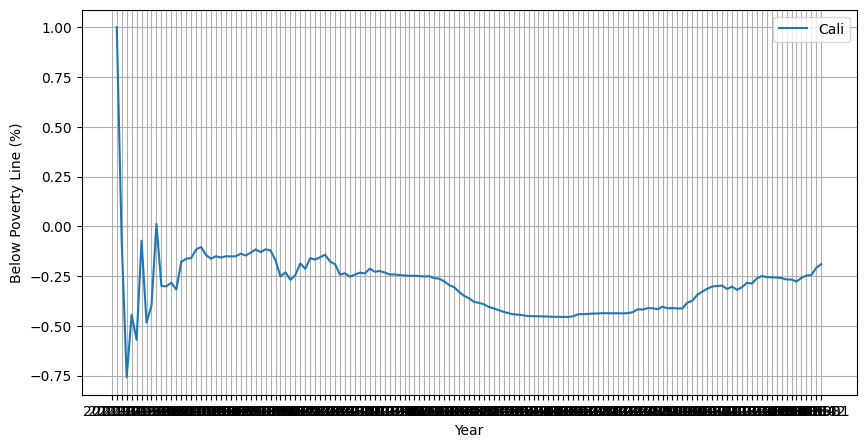

[]

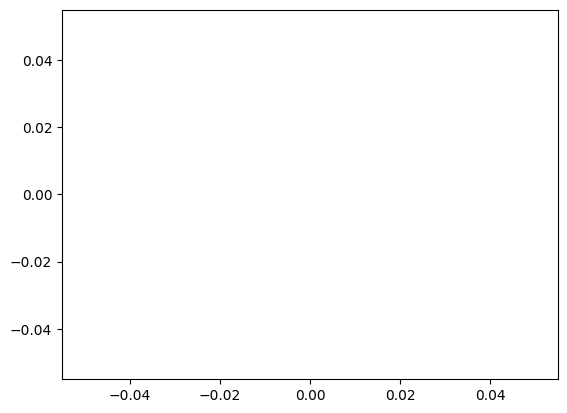

In [108]:
#print(meat_df[meat_df.columns[1:]].corr())
#meat_df[meat_df.columns[1:]].corr().to_csv('state_correlation.csv')
meat_df['expanding_correlation'] = meat_df['delaware-poverty-percent'].expanding().corr(meat_df['Beef'])
meat_df['expanding_correlation'].to_csv('../udataset/state-correlation.csv')

plt.figure(figsize=(10, 5))
plt.plot(meat_df['year-month'], meat_df['expanding_correlation'], label='Cali')
plt.xlabel('Year')
plt.ylabel('Below Poverty Line (%)')
plt.legend()
plt.grid(True)
plt.show()
#x = meat_df['expanding_correlation']
plt.plot()

In [109]:
meat_df

,year-month,Beef,Veal,Pork,Lamb_and_mutton,Broilers,Other_chicken,Turkey,alabama-unemployment-rate,alabama-poverty-percent,...,washington-poverty-percent,west virginia-unemployment-rate,west virginia-poverty-percent,wisconsin-unemployment-rate,wisconsin-poverty-percent,wyoming-unemployment-rate,wyoming-poverty-percent,puerto rico-unemployment-rate,puerto rico-poverty-percent,expanding_correlation
0,2021-12,2326.8,5.1,2393.8,10.5,3700.1,44.7,453.3,9.522216,21.901097,...,11.901780,6.371429,22.300001,5.320001,13.300002,3.600429,12.601500,8.388080,56.200138,NaN
1,2021-11,2342.8,4.5,2397.9,10.9,3665.3,40.6,485.5,9.139630,21.935112,...,11.956293,6.194707,22.300945,5.542568,13.302162,3.612684,12.644392,7.699303,56.204911,1.000000
2,2021-10,2324.9,4.4,2360.0,10.1,3827.8,44.3,470.5,8.136305,21.968022,...,12.007643,6.195413,22.303487,5.323162,13.307906,3.842302,12.679597,7.916955,56.210378,-0.077846
3,2021-09,2259.7,4.3,2253.6,9.2,3928.5,45.8,474.2,7.586904,22.002021,...,12.059022,5.719925,22.307707,4.592172,13.317297,3.851513,12.709994,7.116057,56.216847,-0.758210
4,2021-08,2324.0,4.2,2201.2,8.8,3902.0,47.0,458.6,6.295690,22.034917,...,12.106895,4.553724,22.313247,3.602547,13.329425,3.265162,12.734131,6.111287,56.223843,-0.444725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2010-05,2060.7,9.8,1608.7,11.8,3020.0,40.2,455.1,2.481804,24.569863,...,16.182930,2.892736,23.720438,1.930577,16.023789,1.825228,12.776595,3.297204,56.382192,-0.259116
140,2010-04,2110.8,10.8,1835.9,12.3,3038.3,40.7,490.0,2.425092,24.493425,...,16.142234,2.791837,23.730614,1.815303,15.974667,1.715469,12.694469,3.277047,56.365205,-0.247492
141,2010-03,2180.7,11.9,2025.1,17.0,3162.0,43.4,425.4,2.219950,24.419452,...,16.104229,2.473254,23.743236,1.577080,15.928506,1.557662,12.617058,3.456980,56.348767,-0.245022
142,2010-02,1927.2,10.5,1745.0,11.9,2739.5,34.7,424.2,2.135352,24.343014,...,16.066441,2.284568,23.759503,1.527142,15.882281,1.510756,12.539272,3.498868,56.331781,-0.208393


In [ ]:
p_values = []
r_values = []

for col in meat_df.columns[1:-2]:
    if len(meat_df[pd.notna(meat_df[col])][col]) < 2:
        p_values.append(np.nan)
        r_values.append(np.nan)
        continue

    stats = pearsonr(meat_df[pd.notna(meat_df[col])][col], meat_df[pd.notna(meat_df[col])]['california-poverty-percent'])
    p_values.append(stats[1])
    r_values.append(stats[0])

p_value_df['p_value'] = p_values
p_value_df['r_value'] = r_values

p_value_df

KeyError: 'unemployment_rate'

In [ ]:
#new_df.to_csv('../udataset/growth_vs_unemployment_month.csv')

NameError: name 'new_df' is not defined